In [1]:
from utils.gmsh_function import *
from src.radiation_algorithm.radiation_algorithm import *

In [2]:
mesh_name = "ifa_1.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_1_mat = 'data/antennas_mesh/ifa_1.mat'
ifa_1_msh = save_mesh_folder + mesh_name

In [ ]:
gmsh.initialize()
model_name  = "ifa_1_antenna"
feed_point = [0.0025, 0.1, 0]
feed_length = 0.005

# Create the model
gmsh.model.add(model_name)

# Define points
p0 = gmsh.model.occ.addPoint(0, 0, 0)
p1 = gmsh.model.occ.addPoint(0, 0.1, 0)
p2 = gmsh.model.occ.addPoint(0, 0.155, 0)
p3 = gmsh.model.occ.addPoint(0.05, 0.155, 0)
p4 = gmsh.model.occ.addPoint(0.05, 0.13, 0)
p5 = gmsh.model.occ.addPoint(0.03, 0.13, 0)
p6 = gmsh.model.occ.addPoint(0.03, 0.135, 0)
p7 = gmsh.model.occ.addPoint(0.045, 0.135, 0)
p8 = gmsh.model.occ.addPoint(0.045, 0.15, 0)
p9 = gmsh.model.occ.addPoint(0.005, 0.15, 0)
p10 = gmsh.model.occ.addPoint(0.005, 0.1, 0)
p11 = gmsh.model.occ.addPoint(0.05, 0.1, 0)
p12 = gmsh.model.occ.addPoint(0.05, 0, 0)

# List points in order
points = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12]

# Create lines between consecutive points and close the loop (last to first)
lines = [gmsh.model.occ.addLine(points[i], points[(i + 1) % len(points)]) for i in range(len(points))]
cl = gmsh.model.occ.addCurveLoop(lines)
ifa_1 = gmsh.model.occ.addPlaneSurface([cl])

apply_mesh_size(feed_length)

gmsh.option.setNumber('Mesh.Algorithm', 1)  # 1: MeshAdapt 
gmsh.model.mesh.generate(2)

run()

write(save_mesh_folder, mesh_name)

gmsh.finalize()

extract_msh_to_mat(ifa_1_msh, ifa_1_mat)

In [4]:
impedance, current_ifa = radiation_algorithm(ifa_1_mat, 6.059e+8, feed_point, voltage_amplitude=0.5)

Calculating radiation intensity distribution over sphere surface...

Frequency = 605900000.0 Hz
Longueur d'onde lambda = 0.4947224855266698 m

Total Power :  0.003651
Gain Linear :  1.509189
Gain Logarithmic :  1.787435 dB

gap_curent = (0.014094341757489543-0.002619457791815296j)
Radiation Resistance :  35.535624 Ohms
Directory 'data/antennas_gain_power/' created.
Data saved successfully to data/antennas_gain_power/ifa_1_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/ifa_1_gain_power.mat


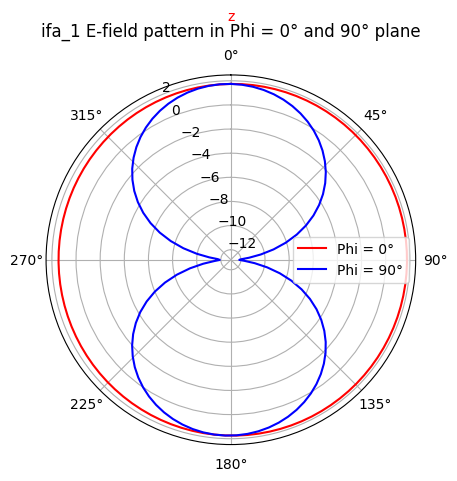

In [ ]:
# Step 2: Radiation intensity distribution over a sphere
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern

# Dense mesh for a sphere used in radiation calculations
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

ifa_1_mesh2_mat = 'data/antennas_mesh2/ifa_1_mesh2.mat'
ifa_1_current_mat = 'data/antennas_current/ifa_1_current.mat'
ifa_1_gain_power_mat = 'data/antennas_gain_power/ifa_1_gain_power.mat'

print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(ifa_1_mesh2_mat, ifa_1_current_mat, filename_sphere_dense, radiation=True)

# Step 3: Generate antenna directivity pattern
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(ifa_1_mesh2_mat, ifa_1_current_mat, ifa_1_gain_power_mat, radiation=True)

In [6]:
from src.scattering_algorithm.scattering_algorithm import *
wave_incident_direction = np.array([0, 0, -1])
polarization=np.array([1, 0, 0])
scattering_algorithm(ifa_1_mat, 6.059e+8, wave_incident_direction, polarization, load_from_matlab=True)

length of antenna ifa_1 = 0.05 meter
width of antenna ifa_1 = 0.155 meter
height of antenna ifa_1 = 0.0 meter


Nombre d'elements de maillage (edges) = 813


Sauvegarde du fichier : ifa_1_current.mat effectué avec succès !

Fréquence de l'onde incidente : 605900000.0 Hz

ifa_1 antenna surface current in receiving mode view is successfully created at frequency 605900000.0 Hz
